<a href="https://colab.research.google.com/github/prasanna-venkatesh-m/CNN_Cats_vs_Dogs_Classification/blob/main/Cats_vs_dogs_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import PIL
import cv2
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import accuracy_score

In [7]:
!curl -L https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -o cats_and_dogs_filtered.zip
!unzip cats_and_dogs_filtered.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 65.4M  100 65.4M    0     0   126M      0 --:--:-- --:--:-- --:--:--  126M
Archive:  cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dog

In [236]:
base_dir = '/content/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [237]:
classes = ['Cat', 'Dog']

In [238]:
le = LabelEncoder()

In [239]:
def process_data(img_size=(32,32)):

  local_x = []
  local_y = []

  for i in range(len(os.listdir(train_dir))):
    dir = os.path.join(train_dir, os.listdir(train_dir)[i])
    for j in range(len(os.listdir(dir))):
      img = cv2.imread(os.path.join(dir, os.listdir(dir)[j]))
      img_resized = cv2.resize(img, img_size)
      local_x.append(img_resized)
      local_y.append(os.listdir(train_dir)[i])

  local_x = np.array(local_x)
  local_x = local_x / 255.0
  local_y = np.array(local_y)
  encoded_y = le.fit_transform(local_y)

  x_train,x_test, y_train, y_test =train_test_split(local_x, encoded_y, test_size=0.2)
  return x_train, x_test, y_train, y_test

In [219]:
def show_images(x, y, y_pred, n=100):
  plt.figure(figsize=(20,16))
  for i in range(n):
    plt.subplot(10, 20, i+1)
    plt.imshow(x[i])
    if len(y_pred) > 0:
      plt.title(f' {classes[y_pred[i]]} ({classes[y[i]]})')
    else:
      plt.title(f'{classes[y[i]]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [241]:
x_train, x_test, y_train, y_test = process_data((48,48))

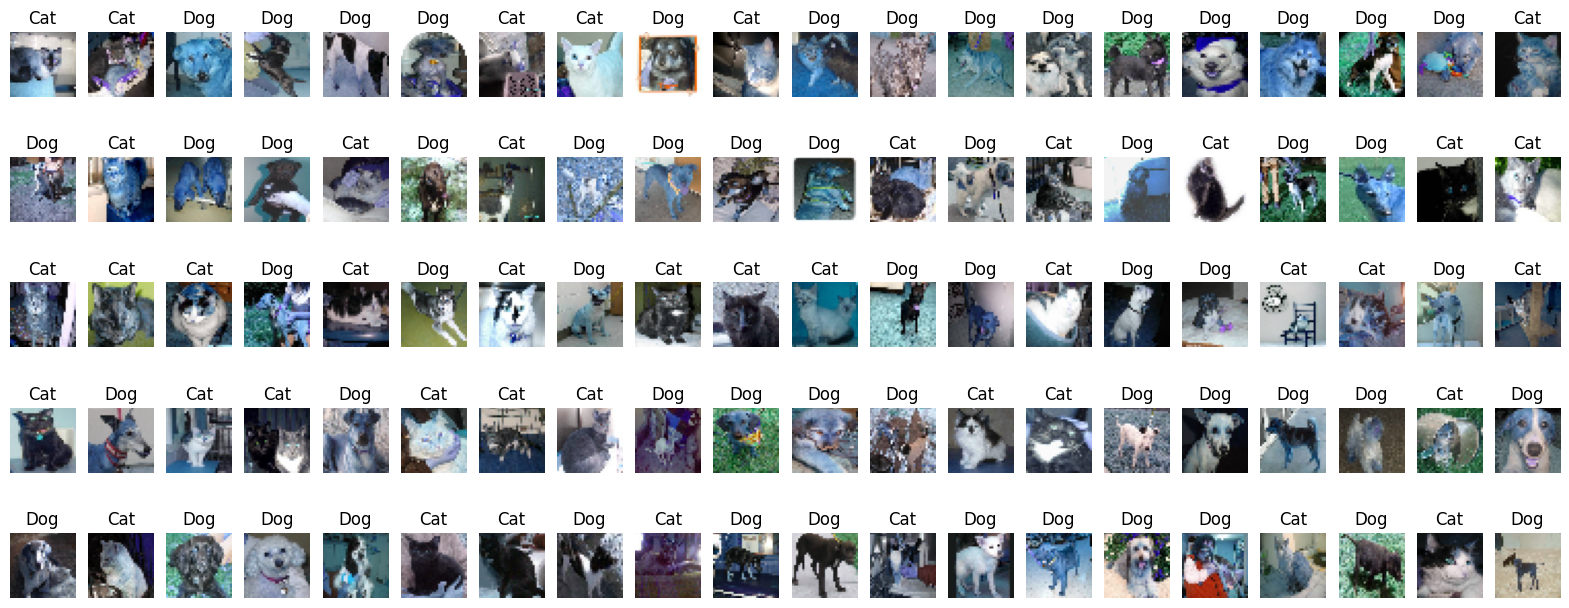

In [221]:
show_images(x_train,y_train, [] )

In [248]:
def evalute_model(y, y_pred):
  result = np.argmax(y_pred, axis=1)
  print(accuracy_score(y, result))

In [257]:
def train_model(x_train, y_train, x_test, y_test, epochs=20):
  model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', padding='same', input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3])),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Conv2D(64,(3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Conv2D(128,(3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Conv2D(64,(3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Conv2D(32,(3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax'),
])
  model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)
  model.fit(x_train, y_train, epochs=epochs)
  y_pred = model.predict(x_test)
  return y_pred

In [258]:
y_pred = train_model(x_train, y_train, x_test, y_test, epochs=20)
evalute_model(y_test, y_pred)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5928 - loss: 0.7030
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6704 - loss: 0.6071
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7647 - loss: 0.5014
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8272 - loss: 0.3889
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8827 - loss: 0.3142
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9030 - loss: 0.2549
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9191 - loss: 0.2104
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9391 - loss: 0.1659
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9309 - loss: 0.1637
Epoch 10/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9632 - loss: 0.0804
Epoch 11/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9628 - loss: 0.0924
Epoch 12/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9828 - lo